### ___Importing the Libraries___

In [1]:

# For Ignoring the warning
import warnings
warnings.filterwarnings("ignore")

# Importing the Libraries for Data Manupulation 
import pandas as pd
import numpy as np

# Importing the libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns 

# Importing the Libraries for Data Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Importing the Libraries for Model Building 
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

In [2]:

# Reading the data from the Dataframe
df = pd.read_csv('NYPD_Shooting_Incident_Data__Historic_.csv')

In [3]:

# Making the Copy of the data frame
df1 = df.copy()

In [4]:

# Viewing the records of the Dataframe
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,NaN,105,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.058925e+06,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.005028e+06,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,NaN,108,0.0,NaN,NaN,True,...,NaN,NaN,25-44,M,WHITE,1.007668e+06,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10/09/2015,18:30:00,BRONX,NaN,44,0.0,NaN,NaN,False,...,NaN,NaN,<18,M,WHITE HISPANIC,1.006537e+06,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,02/19/2009,22:58:00,BRONX,NaN,47,0.0,NaN,NaN,True,...,M,BLACK,45-64,M,BLACK,1.024922e+06,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)


In [5]:
df.columns

Index(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'LOC_OF_OCCUR_DESC',
       'PRECINCT', 'JURISDICTION_CODE', 'LOC_CLASSFCTN_DESC', 'LOCATION_DESC',
       'STATISTICAL_MURDER_FLAG', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE',
       'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD',
       'Latitude', 'Longitude', 'Lon_Lat'],
      dtype='object')

In [6]:

# Dropping the Redundant Columns
df.drop(['LOC_OF_OCCUR_DESC', 'LOC_CLASSFCTN_DESC'], 
        axis = 1, inplace = True)

In [7]:
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,105,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1.058925e+06,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,40,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1.005028e+06,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,108,0.0,NaN,True,NaN,NaN,NaN,25-44,M,WHITE,1.007668e+06,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10/09/2015,18:30:00,BRONX,44,0.0,NaN,False,NaN,NaN,NaN,<18,M,WHITE HISPANIC,1.006537e+06,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,02/19/2009,22:58:00,BRONX,47,0.0,NaN,True,25-44,M,BLACK,45-64,M,BLACK,1.024922e+06,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)


In [8]:

# Getting the Information of the Data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27312 entries, 0 to 27311
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             27312 non-null  int64  
 1   OCCUR_DATE               27312 non-null  object 
 2   OCCUR_TIME               27312 non-null  object 
 3   BORO                     27312 non-null  object 
 4   PRECINCT                 27312 non-null  int64  
 5   JURISDICTION_CODE        27310 non-null  float64
 6   LOCATION_DESC            12335 non-null  object 
 7   STATISTICAL_MURDER_FLAG  27312 non-null  bool   
 8   PERP_AGE_GROUP           17968 non-null  object 
 9   PERP_SEX                 18002 non-null  object 
 10  PERP_RACE                18002 non-null  object 
 11  VIC_AGE_GROUP            27312 non-null  object 
 12  VIC_SEX                  27312 non-null  object 
 13  VIC_RACE                 27312 non-null  object 
 14  X_COORD_CD            

### Removing the rows for the PERP_AGE_GROUP which are redundant

In [9]:
# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Define the age groups to delete
age_groups_to_remove = ['940', '1020', '224']  # Specify the values you want to remove

# Remove the specified age groups in the same DataFrame
df = df[~df['PERP_AGE_GROUP'].isin(age_groups_to_remove)]

# Display the updated DataFrame
print("\nUpdated DataFrame after removing specified age groups:")
print(df)

# Display the updated counts
print("\nUpdated value counts:")
print(df['PERP_AGE_GROUP'].value_counts())

Original DataFrame:
       INCIDENT_KEY  OCCUR_DATE OCCUR_TIME       BORO  PRECINCT  \
0         228798151  05/27/2021   21:30:00     QUEENS       105   
1         137471050  06/27/2014   17:40:00      BRONX        40   
2         147998800  11/21/2015   03:56:00     QUEENS       108   
3         146837977  10/09/2015   18:30:00      BRONX        44   
4          58921844  02/19/2009   22:58:00      BRONX        47   
...             ...         ...        ...        ...       ...   
27307     245029823  05/14/2022   03:02:00      BRONX        48   
27308     239583450  01/22/2022   13:15:00  MANHATTAN        30   
27309     246825728  06/18/2022   03:29:00  MANHATTAN        32   
27310     246876579  06/19/2022   20:08:00      BRONX        46   
27311     239861542  01/28/2022   18:14:00      BRONX        45   

       JURISDICTION_CODE              LOCATION_DESC  STATISTICAL_MURDER_FLAG  \
0                    0.0                        NaN                    False   
1              

### Removing the rows for the VIC_AGE_GROUP which are redundant

In [10]:
# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Define the age groups to delete
age_groups_to_remove = ['1022']  # Specify the values you want to remove

# Remove the specified age groups in the same DataFrame
df = df[~df['VIC_AGE_GROUP'].isin(age_groups_to_remove)]

# Display the updated DataFrame
print("\nUpdated DataFrame after removing specified age groups:")
print(df)

# Display the updated counts
print("\nUpdated value counts:")
print(df['VIC_AGE_GROUP'].value_counts())

Original DataFrame:
       INCIDENT_KEY  OCCUR_DATE OCCUR_TIME       BORO  PRECINCT  \
0         228798151  05/27/2021   21:30:00     QUEENS       105   
1         137471050  06/27/2014   17:40:00      BRONX        40   
2         147998800  11/21/2015   03:56:00     QUEENS       108   
3         146837977  10/09/2015   18:30:00      BRONX        44   
4          58921844  02/19/2009   22:58:00      BRONX        47   
...             ...         ...        ...        ...       ...   
27307     245029823  05/14/2022   03:02:00      BRONX        48   
27308     239583450  01/22/2022   13:15:00  MANHATTAN        30   
27309     246825728  06/18/2022   03:29:00  MANHATTAN        32   
27310     246876579  06/19/2022   20:08:00      BRONX        46   
27311     239861542  01/28/2022   18:14:00      BRONX        45   

       JURISDICTION_CODE              LOCATION_DESC  STATISTICAL_MURDER_FLAG  \
0                    0.0                        NaN                    False   
1              

In [11]:
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,105,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1.058925e+06,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,40,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1.005028e+06,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,108,0.0,NaN,True,NaN,NaN,NaN,25-44,M,WHITE,1.007668e+06,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10/09/2015,18:30:00,BRONX,44,0.0,NaN,False,NaN,NaN,NaN,<18,M,WHITE HISPANIC,1.006537e+06,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,02/19/2009,22:58:00,BRONX,47,0.0,NaN,True,25-44,M,BLACK,45-64,M,BLACK,1.024922e+06,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)


### Creating the features from datetime so we can inspect on what das or at which time the murders are happeing more

In [12]:
df['Date'] = pd.to_datetime(df['OCCUR_DATE'])
df['Year'] = df['Date'].dt.year
df['Month_number'] = df['Date'].dt.month
df['Month_name'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day
df['Weekdays'] = df['Date'].dt.strftime('%A')
df['Hour'] = df['OCCUR_TIME'].apply(lambda date : int(date.split(':')[0]))

In [13]:
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,...,Latitude,Longitude,Lon_Lat,Date,Year,Month_number,Month_name,Day,Weekdays,Hour
0,228798151,05/27/2021,21:30:00,QUEENS,105,0.0,NaN,False,NaN,NaN,...,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025),2021-05-27,2021,5,May,27,Thursday,21
1,137471050,06/27/2014,17:40:00,BRONX,40,0.0,NaN,False,NaN,NaN,...,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006),2014-06-27,2014,6,June,27,Friday,17
2,147998800,11/21/2015,03:56:00,QUEENS,108,0.0,NaN,True,NaN,NaN,...,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004),2015-11-21,2015,11,November,21,Saturday,3
3,146837977,10/09/2015,18:30:00,BRONX,44,0.0,NaN,False,NaN,NaN,...,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003),2015-10-09,2015,10,October,9,Friday,18
4,58921844,02/19/2009,22:58:00,BRONX,47,0.0,NaN,True,25-44,M,...,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006),2009-02-19,2009,2,February,19,Thursday,22


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27308 entries, 0 to 27311
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   INCIDENT_KEY             27308 non-null  int64         
 1   OCCUR_DATE               27308 non-null  object        
 2   OCCUR_TIME               27308 non-null  object        
 3   BORO                     27308 non-null  object        
 4   PRECINCT                 27308 non-null  int64         
 5   JURISDICTION_CODE        27306 non-null  float64       
 6   LOCATION_DESC            12331 non-null  object        
 7   STATISTICAL_MURDER_FLAG  27308 non-null  bool          
 8   PERP_AGE_GROUP           17964 non-null  object        
 9   PERP_SEX                 17998 non-null  object        
 10  PERP_RACE                17998 non-null  object        
 11  VIC_AGE_GROUP            27308 non-null  object        
 12  VIC_SEX                  27308 n

In [15]:

# Making the copy so that we can reset the index to time and work on it 
dff = df.copy()

In [16]:
dff.drop(['OCCUR_DATE', 'OCCUR_TIME'], axis = 1, inplace = True)

> __To combine the OCCUR_DATE and OCCUR_TIME columns into a single datetime column where both the date and time are considered, you can first ensure that both columns are in the appropriate formats (with OCCUR_DATE as a date and OCCUR_TIME as a time). Then, you'll concatenate them and use pd.to_datetime() to create a unified datetime column.__

In [17]:

# Ensure OCCUR_DATE is already in datetime format (as date):
# Convert OCCUR_TIME to a string or datetime format that only reflects time (if it’s not already):

df['OCCUR_DATE'] = pd.to_datetime(df['OCCUR_DATE'])
df['OCCUR_TIME'] = pd.to_datetime(df['OCCUR_TIME'], format='%H:%M:%S').dt.time


In [18]:

# Combine both OCCUR_DATE and OCCUR_TIME into a single column by merging them:

dff['OCCUR_DATETIME'] = pd.to_datetime(df['OCCUR_DATE'].astype(str) + ' ' + df['OCCUR_TIME'].astype(str))


## Monthly Shooting Trends

In [19]:
monthly_trend = dff['Month_name'].groupby(dff.Date.dt.month_name()).agg('count').to_frame(name="count")

calendar = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_trend = monthly_trend.reindex(calendar, axis=0).reset_index()

In [20]:
monthly_trend

,Date,count
0,January,1716
1,February,1340
2,March,1686
3,April,1982
4,May,2571
5,June,2829
6,July,3237
7,August,3156
8,September,2572
9,October,2279


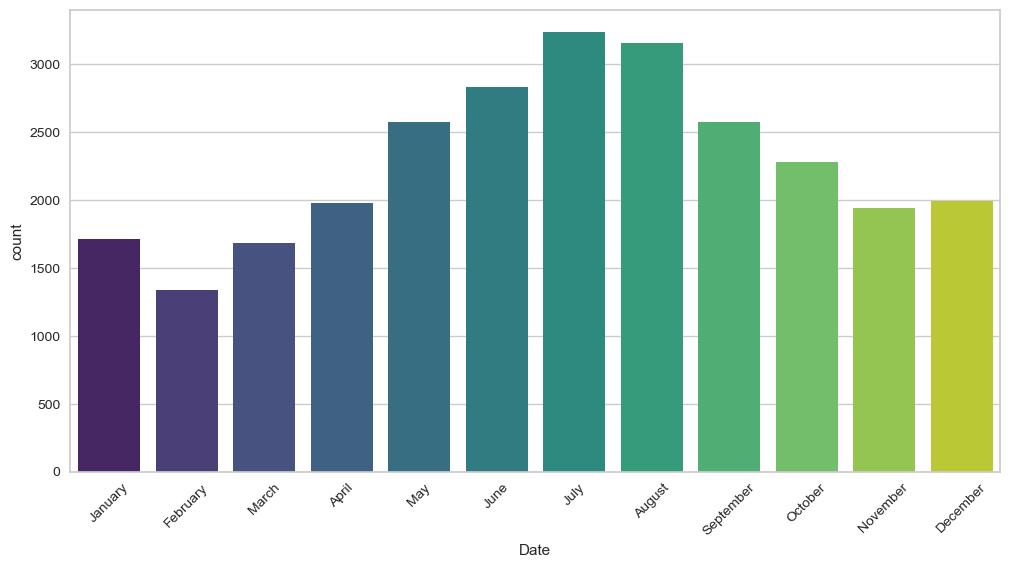

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(data = monthly_trend, x = 'Date', y = 'count', palette='viridis')
plt.xticks(rotation = 45)
plt.show()

> __From the Above graph we can to Know that the in the month of July and August more Muders are Happeing.__

## Weekly Shooting Trend

In [22]:
# Group by the day of the week and count occurrences
weekly_trend = dff['Weekdays'].groupby(dff.Date.dt.day_name()).agg('count').to_frame(name="count")

# Define the correct order of days in the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the DataFrame to ensure the days follow the order of the calendar week
weekly_trend = weekly_trend.reindex(days_of_week, axis=0).reset_index()

# Rename the column for clarity
weekly_trend.rename(columns={'index': 'Day'}, inplace=True)

In [23]:
weekly_trend

,Date,count
0,Monday,3883
1,Tuesday,3162
2,Wednesday,3000
3,Thursday,3034
4,Friday,3585
5,Saturday,5193
6,Sunday,5451


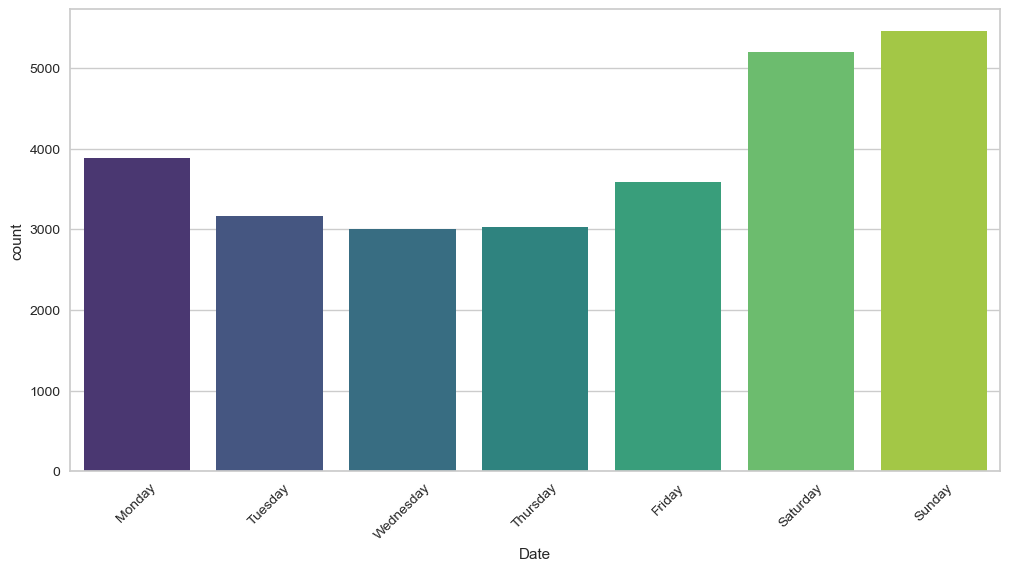

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(data = weekly_trend, x = 'Date', y = 'count', palette='viridis')
plt.xticks(rotation = 45)
plt.show()

> __From the Above Graph we can to know that Muder are happening more on Saturdays and Sundays i.e during the weekends.__

## Hourly Shooting Trends

In [25]:
# Group by the hour and count occurrences
hourly_trend = dff['Hour'].groupby(dff['Hour']).agg('count').to_frame(name="count")

# Define the correct order of hours
hours_of_day = list(range(24))  # 0 to 23 for hours in a day

# Reindex the DataFrame to ensure the hours follow the correct order
hourly_trend = hourly_trend.reindex(hours_of_day, axis=0).reset_index()

# Rename the column for clarity
hourly_trend.rename(columns={'index': 'Hour'}, inplace=True)


In [26]:
hourly_trend

,Hour,count
0,0,2186
1,1,2081
2,2,1811
3,3,1633
4,4,1440
5,5,702
6,6,366
7,7,233
8,8,238
9,9,217


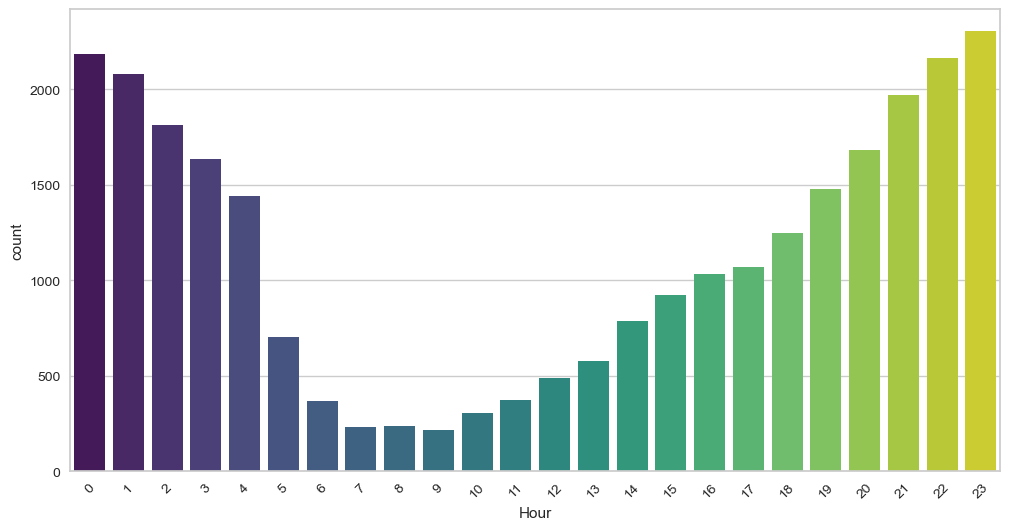

In [95]:
plt.figure(figsize=(12, 6))
sns.barplot(data = hourly_trend, x = 'Hour', y = 'count', palette='viridis')
plt.xticks(rotation = 45)
plt.show()

> __From the above Graph we came to know that Murders are happening more in the night time compared to day time.__

In [28]:

# Finding the Min Date range
dff['OCCUR_DATETIME'].min()

Timestamp('2006-01-01 02:00:00')

In [29]:

# Finding the Max Date range
dff['OCCUR_DATETIME'].max()

Timestamp('2022-12-31 23:41:00')

In [30]:
dff['BORO'].value_counts()

BROOKLYN         10932
BRONX             7935
QUEENS            4094
MANHATTAN         3571
STATEN ISLAND      776
Name: BORO, dtype: int64

<AxesSubplot:xlabel='BORO', ylabel='count'>

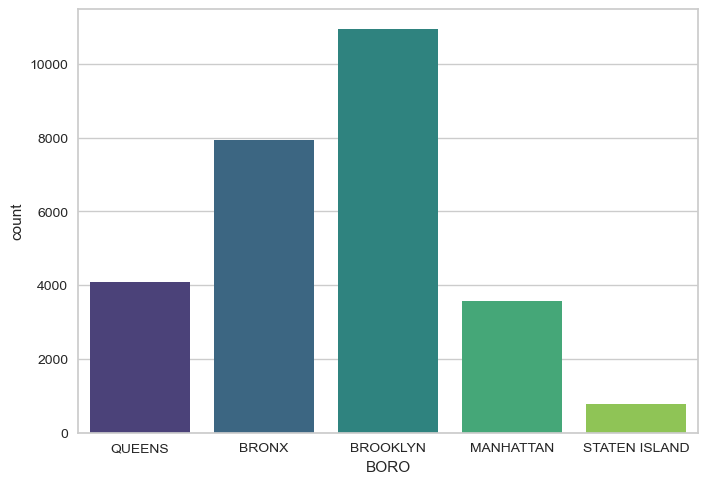

In [31]:
sns.countplot(data = dff, x = 'BORO', palette = 'viridis')

> __From the above graph we came to know that BROOKLYN has more numbers murders followed by BRONX, QUEENS, MANHATTAN, STATTEN ISLAND.__

In [32]:
# Group by Year and BORO, and count occurrences
Yearly_Boro_df = dff.groupby(['Year', 'BORO']).size().reset_index(name='count')


In [33]:
#Yearly_Boro_df

In [34]:
# Group by Year and BORO, and count occurrences
Yearly_Boro_df = dff.groupby(['Year', 'BORO']).size().reset_index(name='count')


# Create a pivot table for better visualization
pivot_table = Yearly_Boro_df.pivot(index='Year', columns='BORO', values='count').fillna(0)

# Reset the index to have a clean DataFrame
pivot_table = pivot_table.reset_index()



In [35]:
#pivot_table

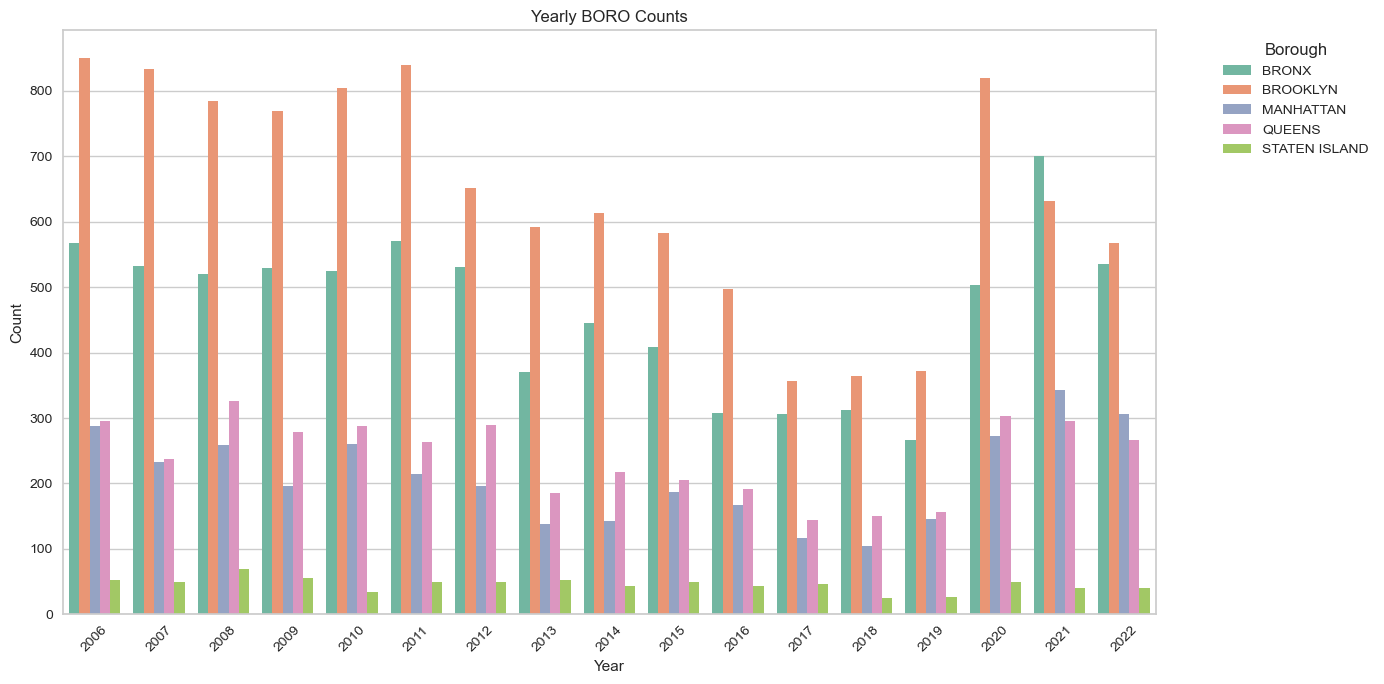

In [36]:

# Set the figure size
plt.figure(figsize=(14, 7))

# Use Seaborn's barplot
# Convert pivot_table to long format for easier plotting
pivot_long = pivot_table.melt(id_vars='Year', var_name='BORO', value_name='count')

# Create a custom color palette
custom_palette = sns.color_palette("Set2", n_colors=len(pivot_long['BORO'].unique()))

# Create the bar plot with the custom palette
sns.barplot(data=pivot_long, x='Year', y='count', hue='BORO', palette=custom_palette)

# Customize the plot
plt.title('Yearly BORO Counts')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


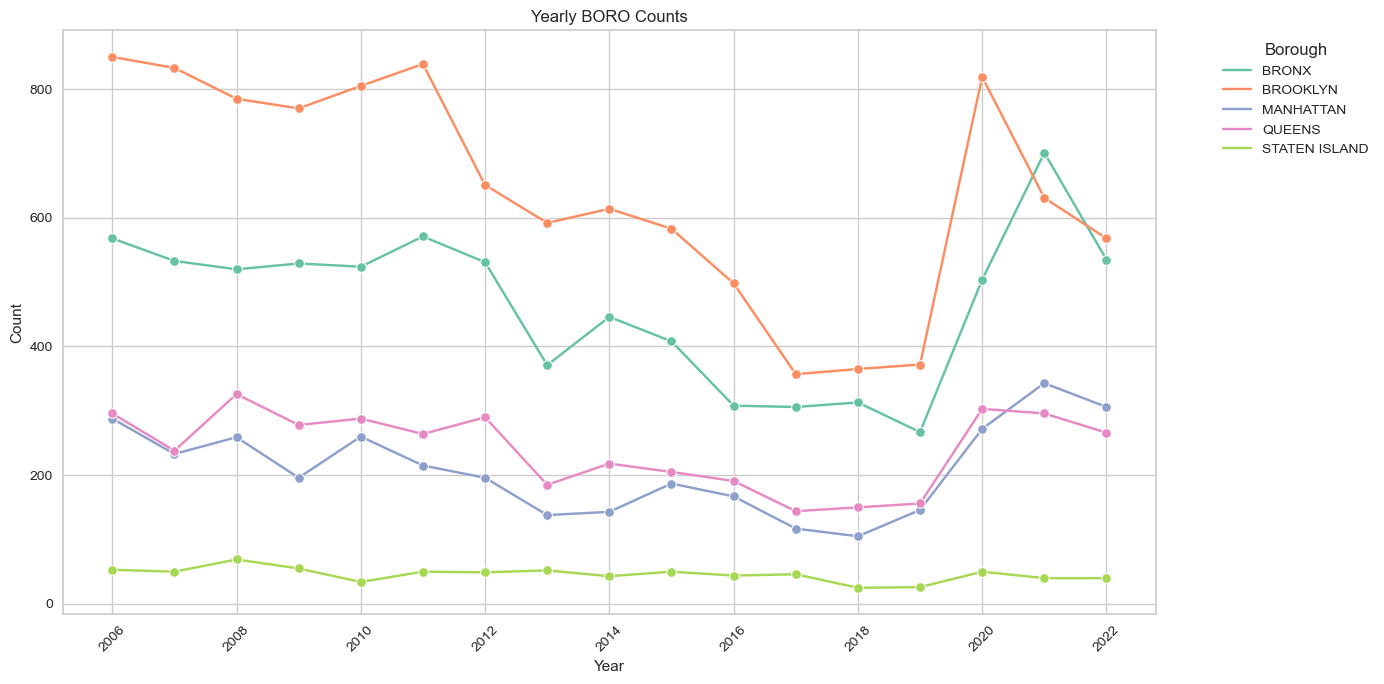

In [37]:
# Set the figure size
plt.figure(figsize=(14, 7))

# Create the line plot with the custom palette
sns.lineplot(data=pivot_long, x='Year', y='count', hue='BORO', marker='o', palette=custom_palette)

# Customize the plot
plt.title('Yearly BORO Counts')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()



___This graph titled "Yearly BORO Counts" illustrates trends in data counts across five boroughs from 2006 to 2022. Here are some insights:___

> Brooklyn: The orange line representing Brooklyn shows the highest overall counts. Peaks around 2006 and 2020 indicate significant activity or events in these years.

> Manhattan: Represented by the blue line, Manhattan shows fluctuations but maintains relatively high counts, particularly around 2006 and 2020.

> Bronx: The teal line for Bronx shows a steady increase over the years, peaking in recent years.

> Queens: The pink line representing Queens shows moderate counts with a noticeable peak around 2020.

> Staten Island: The green line for Staten Island consistently shows the lowest counts, indicating fewer events or activities compared to other boroughs.

## Most Prone area For Shooting

In [38]:
dff['LOCATION_DESC'].value_counts()

MULTI DWELL - PUBLIC HOUS    4831
MULTI DWELL - APT BUILD      2835
(null)                        976
PVT HOUSE                     951
GROCERY/BODEGA                694
BAR/NIGHT CLUB                627
COMMERCIAL BLDG               292
RESTAURANT/DINER              204
NONE                          175
BEAUTY/NAIL SALON             112
FAST FOOD                     104
SOCIAL CLUB/POLICY LOCATI      72
GAS STATION                    70
HOSPITAL                       65
LIQUOR STORE                   41
SMALL MERCHANT                 37
STORE UNCLASSIFIED             36
HOTEL/MOTEL                    35
DRY CLEANER/LAUNDRY            31
SUPERMARKET                    21
DRUG STORE                     14
CLOTHING BOUTIQUE              14
JEWELRY STORE                  12
TELECOMM. STORE                11
VARIETY STORE                  11
SHOE STORE                     10
DEPT STORE                      9
FACTORY/WAREHOUSE               8
VIDEO STORE                     8
CANDY STORE   

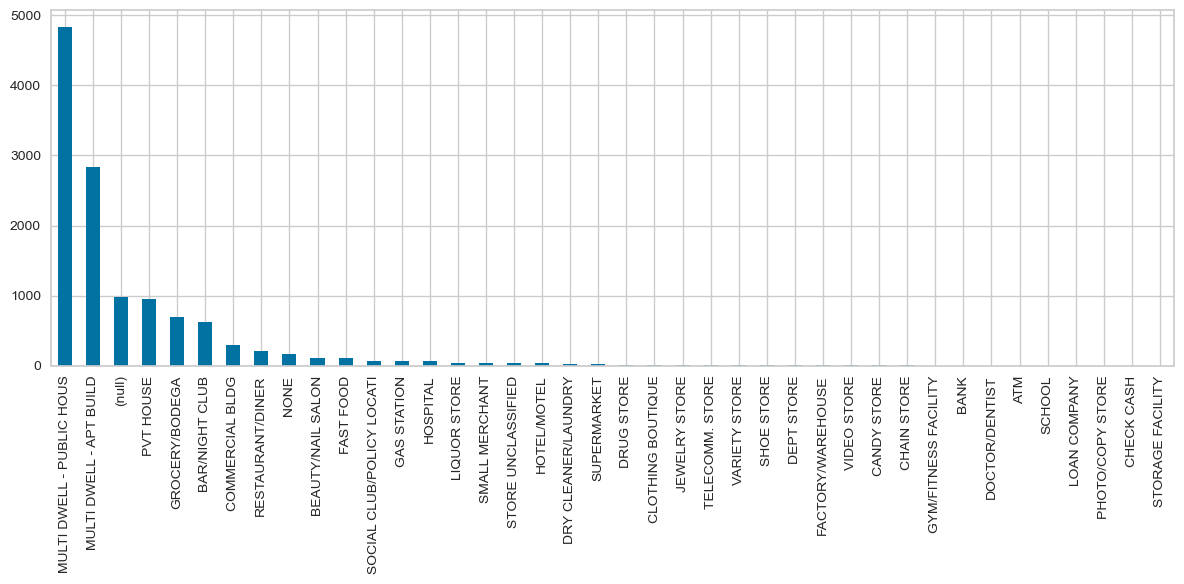

In [39]:
plt.figure(figsize=(12, 6))
dff['LOCATION_DESC'].value_counts().plot(kind = 'bar', figsize = (12, 6))
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

__This bar chart displays the frequency of various types of buildings or establishments. The categories on the x-axis range from residential buildings like "MULTI DWELL - PUBLIC HOUS" and "PVT HOUSE" to commercial establishments such as "GROCERY/BODEGA" and "LIQUOR STORE."__

___Key Insights:___

> Residential Buildings: "MULTI DWELL - PUBLIC HOUS" has the highest frequency, indicating a significant number of occurrences, followed by "MULTI DWELL - APT BUILD."

> Commercial Establishments: "GROCERY/BODEGA" and "BAR/NIGHT CLUB" have notable counts, reflecting their commonality in the dataset.

> Lower Frequencies: Categories like "SHOE STORE," "CANDY STORE," and "ATM" have relatively low counts, indicating they are less common.

> Miscellaneous Categories: "SOCIAL CLUB/POLICY LOCAT" and "VIDEO STORE" also show lower frequencies, suggesting fewer occurrences.

> This chart offers valuable insight into the distribution and frequency of different types of buildings or establishments, highlighting which types are most prevalent.

## Analysis Of Shooter Identity

In [40]:

# As the Shooter or the Perps Data is not present we will have to clean in it
dff['PERP_AGE_GROUP'].fillna('UNKNOWN', inplace = True)
dff['PERP_SEX'].fillna('U', inplace = True)
dff['PERP_RACE'].fillna('UNKNOWN', inplace = True)

In [41]:
Shooter_Age = dff[dff['PERP_AGE_GROUP'].isin(['25-44', '18-24', '<18', 'UNKNOWN', '45-64', '65+'])]

In [42]:
profile_df = pd.pivot_table(Shooter_Age, values = 'INCIDENT_KEY', index = 'PERP_AGE_GROUP', 
               columns = 'PERP_SEX', aggfunc=(lambda x: x.count().round()), margins = True).reindex(['<18', '18-24', '25-44', '45-64', '65+', 'UNKNOWN', 'All'])
profile_df

PERP_SEX,F,M,U,All
PERP_AGE_GROUP,,,,
<18,39.0,1549.0,3.0,1591
18-24,155.0,6050.0,16.0,6221
25-44,191.0,5489.0,7.0,5687
45-64,20.0,597.0,NaN,617
65+,1.0,59.0,NaN,60
UNKNOWN,18.0,1691.0,10783.0,12492
All,424.0,15435.0,10809.0,26668


> __As men dominate the number of shootings by far, I will drop the sex criteria to introduce the racial one.__

In [43]:
profile_df2 = pd.pivot_table(Shooter_Age, values = 'INCIDENT_KEY', index = 'PERP_AGE_GROUP', 
               columns = 'PERP_RACE', aggfunc=(lambda x: x.count().round()), margins = True).reindex(['<18', '18-24', '25-44', '45-64', '65+', 'UNKNOWN', 'All'])
profile_df2

PERP_RACE,AMERICAN INDIAN/ALASKAN NATIVE,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,UNKNOWN,WHITE,WHITE HISPANIC,All
PERP_AGE_GROUP,,,,,,,,
<18,NaN,14.0,1184.0,130.0,16.0,9.0,238.0,1591
18-24,1.0,45.0,4446.0,601.0,64.0,50.0,1014.0,6221
25-44,1.0,76.0,4124.0,438.0,59.0,141.0,848.0,5687
45-64,NaN,8.0,399.0,47.0,5.0,55.0,103.0,617
65+,NaN,NaN,28.0,5.0,1.0,17.0,9.0,60
UNKNOWN,NaN,11.0,1249.0,93.0,11001.0,11.0,127.0,12492
All,2.0,154.0,11430.0,1314.0,11146.0,283.0,2339.0,26668


## Analysis of Victims Indentity

In [44]:
victim_df = pd.pivot_table(Shooter_Age, values = 'INCIDENT_KEY', index = 'VIC_AGE_GROUP', 
               columns = 'VIC_SEX', aggfunc=(lambda x: x.count().round()), margins = True).reindex(['<18', '18-24', '25-44', '45-64', '65+', 'UNKNOWN', 'All'])
victim_df

VIC_SEX,F,M,U,All
VIC_AGE_GROUP,,,,
<18,403.0,2379.0,NaN,2782
18-24,766.0,9134.0,4.0,9904
25-44,972.0,10965.0,2.0,11939
45-64,341.0,1465.0,NaN,1806
65+,56.0,120.0,NaN,176
UNKNOWN,5.0,51.0,5.0,61
All,2543.0,24114.0,11.0,26668


In [45]:
profile_df2 = pd.pivot_table(Shooter_Age, values = 'INCIDENT_KEY', index = 'VIC_AGE_GROUP', 
               columns = 'VIC_RACE', aggfunc=(lambda x: x.count().round()), margins = True).reindex(['<18', '18-24', '25-44', '45-64', '65+', 'UNKNOWN', 'All'])
profile_df2

VIC_RACE,AMERICAN INDIAN/ALASKAN NATIVE,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,UNKNOWN,WHITE,WHITE HISPANIC,All
VIC_AGE_GROUP,,,,,,,,
<18,2.0,16.0,2049.0,295.0,4.0,27.0,389.0,2782
18-24,4.0,117.0,7190.0,971.0,20.0,143.0,1459.0,9904
25-44,3.0,193.0,8493.0,1126.0,21.0,323.0,1780.0,11939
45-64,NaN,57.0,1149.0,175.0,5.0,150.0,270.0,1806
65+,NaN,5.0,92.0,17.0,NaN,29.0,33.0,176
UNKNOWN,NaN,1.0,18.0,4.0,16.0,14.0,8.0,61
All,9.0,389.0,18991.0,2588.0,66.0,686.0,3939.0,26668


In [46]:
dff.head()

,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,...,Longitude,Lon_Lat,Date,Year,Month_number,Month_name,Day,Weekdays,Hour,OCCUR_DATETIME
0,228798151,QUEENS,105,0.0,NaN,False,UNKNOWN,U,UNKNOWN,18-24,...,-73.730839,POINT (-73.73083868899994 40.662964620000025),2021-05-27,2021,5,May,27,Thursday,21,2021-05-27 21:30:00
1,137471050,BRONX,40,0.0,NaN,False,UNKNOWN,U,UNKNOWN,18-24,...,-73.924942,POINT (-73.92494232599995 40.81035186300006),2014-06-27,2014,6,June,27,Friday,17,2014-06-27 17:40:00
2,147998800,QUEENS,108,0.0,NaN,True,UNKNOWN,U,UNKNOWN,25-44,...,-73.915492,POINT (-73.91549174199997 40.74260663300004),2015-11-21,2015,11,November,21,Saturday,3,2015-11-21 03:56:00
3,146837977,BRONX,44,0.0,NaN,False,UNKNOWN,U,UNKNOWN,<18,...,-73.919457,POINT (-73.91945661499994 40.83778200300003),2015-10-09,2015,10,October,9,Friday,18,2015-10-09 18:30:00
4,58921844,BRONX,47,0.0,NaN,True,25-44,M,BLACK,45-64,...,-73.852910,POINT (-73.85290950899997 40.88623791800006),2009-02-19,2009,2,February,19,Thursday,22,2009-02-19 22:58:00


In [47]:
dff.isnull().sum()

INCIDENT_KEY                   0
BORO                           0
PRECINCT                       0
JURISDICTION_CODE              2
LOCATION_DESC              14977
STATISTICAL_MURDER_FLAG        0
PERP_AGE_GROUP                 0
PERP_SEX                       0
PERP_RACE                      0
VIC_AGE_GROUP                  0
VIC_SEX                        0
VIC_RACE                       0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                      10
Longitude                     10
Lon_Lat                       10
Date                           0
Year                           0
Month_number                   0
Month_name                     0
Day                            0
Weekdays                       0
Hour                           0
OCCUR_DATETIME                 0
dtype: int64

In [48]:
dff['LOCATION_DESC'].fillna('Other', inplace = True)

In [49]:
dff.isnull().sum()

INCIDENT_KEY                0
BORO                        0
PRECINCT                    0
JURISDICTION_CODE           2
LOCATION_DESC               0
STATISTICAL_MURDER_FLAG     0
PERP_AGE_GROUP              0
PERP_SEX                    0
PERP_RACE                   0
VIC_AGE_GROUP               0
VIC_SEX                     0
VIC_RACE                    0
X_COORD_CD                  0
Y_COORD_CD                  0
Latitude                   10
Longitude                  10
Lon_Lat                    10
Date                        0
Year                        0
Month_number                0
Month_name                  0
Day                         0
Weekdays                    0
Hour                        0
OCCUR_DATETIME              0
dtype: int64

In [50]:

# Dropping the remainging null Values 
dff.dropna(inplace = True)

In [51]:
dff.isnull().sum()

INCIDENT_KEY               0
BORO                       0
PRECINCT                   0
JURISDICTION_CODE          0
LOCATION_DESC              0
STATISTICAL_MURDER_FLAG    0
PERP_AGE_GROUP             0
PERP_SEX                   0
PERP_RACE                  0
VIC_AGE_GROUP              0
VIC_SEX                    0
VIC_RACE                   0
X_COORD_CD                 0
Y_COORD_CD                 0
Latitude                   0
Longitude                  0
Lon_Lat                    0
Date                       0
Year                       0
Month_number               0
Month_name                 0
Day                        0
Weekdays                   0
Hour                       0
OCCUR_DATETIME             0
dtype: int64

In [52]:

# Dropping the columns that are not needed while training the model
dff.columns

Index(['INCIDENT_KEY', 'BORO', 'PRECINCT', 'JURISDICTION_CODE',
       'LOCATION_DESC', 'STATISTICAL_MURDER_FLAG', 'PERP_AGE_GROUP',
       'PERP_SEX', 'PERP_RACE', 'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE',
       'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat', 'Date',
       'Year', 'Month_number', 'Month_name', 'Day', 'Weekdays', 'Hour',
       'OCCUR_DATETIME'],
      dtype='object')

In [53]:
dff.drop(['INCIDENT_KEY', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 
          'Lon_Lat', 'Date', 'Year', 'Month_number', 'Month_name', 'Day', 'Weekdays', 'Hour',
          'OCCUR_DATETIME'], axis = 1, inplace = True)

In [54]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27296 entries, 0 to 27311
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BORO                     27296 non-null  object 
 1   PRECINCT                 27296 non-null  int64  
 2   JURISDICTION_CODE        27296 non-null  float64
 3   LOCATION_DESC            27296 non-null  object 
 4   STATISTICAL_MURDER_FLAG  27296 non-null  bool   
 5   PERP_AGE_GROUP           27296 non-null  object 
 6   PERP_SEX                 27296 non-null  object 
 7   PERP_RACE                27296 non-null  object 
 8   VIC_AGE_GROUP            27296 non-null  object 
 9   VIC_SEX                  27296 non-null  object 
 10  VIC_RACE                 27296 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 2.3+ MB


### Label Encoding the required columns

In [55]:
le = LabelEncoder()

In [56]:
dff['BORO'] = le.fit_transform(dff['BORO'])
dff['LOCATION_DESC'] = le.fit_transform(dff['LOCATION_DESC'])
dff['STATISTICAL_MURDER_FLAG'] = le.fit_transform(dff['STATISTICAL_MURDER_FLAG'])
dff['PERP_AGE_GROUP'] = le.fit_transform(dff['PERP_AGE_GROUP'])
dff['PERP_SEX'] = le.fit_transform(dff['PERP_SEX'])
dff['PERP_RACE'] = le.fit_transform(dff['PERP_RACE'])
dff['VIC_AGE_GROUP'] = le.fit_transform(dff['VIC_AGE_GROUP'])
dff['VIC_SEX'] = le.fit_transform(dff['VIC_SEX'])
dff['VIC_RACE'] = le.fit_transform(dff['VIC_RACE'])

In [57]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27296 entries, 0 to 27311
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BORO                     27296 non-null  int32  
 1   PRECINCT                 27296 non-null  int64  
 2   JURISDICTION_CODE        27296 non-null  float64
 3   LOCATION_DESC            27296 non-null  int32  
 4   STATISTICAL_MURDER_FLAG  27296 non-null  int64  
 5   PERP_AGE_GROUP           27296 non-null  int32  
 6   PERP_SEX                 27296 non-null  int32  
 7   PERP_RACE                27296 non-null  int32  
 8   VIC_AGE_GROUP            27296 non-null  int32  
 9   VIC_SEX                  27296 non-null  int32  
 10  VIC_RACE                 27296 non-null  int32  
dtypes: float64(1), int32(8), int64(2)
memory usage: 1.7 MB


In [58]:
dff.head()

,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE
0,3,105,0.0,27,0,6,3,5,0,1,2
1,0,40,0.0,27,0,6,3,5,0,1,2
2,3,108,0.0,27,1,6,3,5,1,1,5
3,0,44,0.0,27,0,6,3,5,4,1,6
4,0,47,0.0,27,1,2,2,3,2,1,2


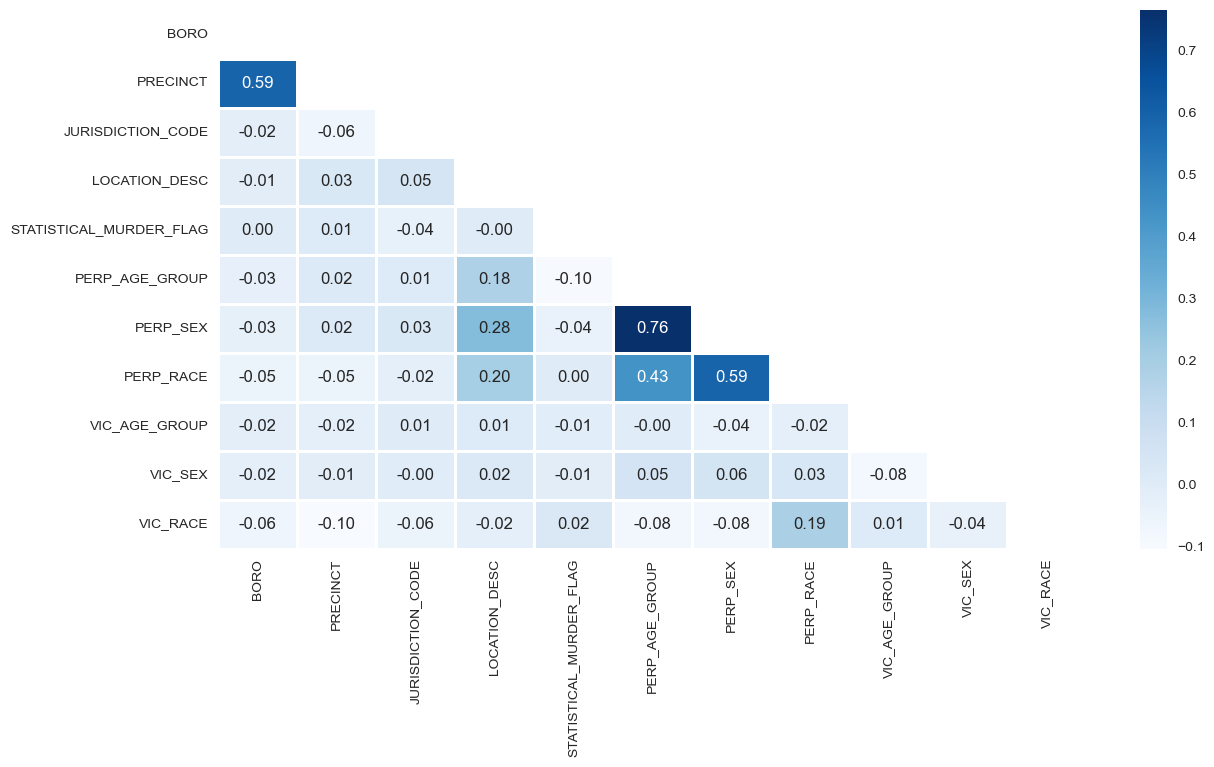

In [59]:
# Calculating the correlation matrix for the DataFrame
corr = dff.corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(14, 7))
sns.heatmap(
    corr, 
    annot = True,           # Annotates each cell with the correlation coefficient
    fmt = '.2f',            # Formats the annotations to 2 decimal places
    linewidths = 1,     # Adds a line between cells
    linecolor = 'white',    # Color of the lines between cells
    mask = np.triu(corr),   # Masks the upper triangle of the heatmap to avoid redundancy
    cmap = 'Blues'          # Color map for the heatmap
)
plt.show()



__This heatmap shows the correlation matrix between various variables related to crime data. The variables include BORO, PRECINCT, JURISDICTION_CODE, LOCATION_DESC, STATISTICAL_MURDER_FLAG, PERP_AGE_GROUP, PERP_SEX, PERP_RACE, VIC_AGE_GROUP, VIC_SEX, and VIC_RACE. The color intensity represents the strength and direction of the correlation, with darker blue indicating a stronger positive correlation and lighter shades indicating weaker or negative correlations.__

___Key Insights:___

> PERP_SEX and PERP_RACE: There is a strong positive correlation (0.76) between these two variables, indicating a significant relationship.

> BORO and PRECINCT: There is a moderate positive correlation (0.59), suggesting that these variables are related to each other.

> OTHER CORRELATIONS: Other variables show varying degrees of correlation, highlighting the complex interrelationships within the crime data.

In [60]:
# Making the Object of the StandardScalar
sc = StandardScaler()

scaled_df = sc.fit_transform(dff)

scaled_df = pd.DataFrame(scaled_df, columns = dff.columns)


In [61]:
scaled_df

,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE
0,1.603032,1.441689,-0.443211,0.411595,-0.488915,0.992077,1.062391,0.590964,-0.862598,0.323101,-0.514929
1,-1.106284,-0.939088,-0.443211,0.411595,-0.488915,0.992077,1.062391,0.590964,-0.862598,0.323101,-0.514929
2,1.603032,1.551571,-0.443211,0.411595,2.045346,0.992077,1.062391,0.590964,-0.027741,0.323101,1.529804
3,-1.106284,-0.792579,-0.443211,0.411595,-0.488915,0.992077,1.062391,0.590964,2.476831,0.323101,2.211382
4,-1.106284,-0.682697,-0.443211,0.411595,2.045346,-0.777725,-0.532627,-0.820566,0.807116,0.323101,-0.514929
...,...,...,...,...,...,...,...,...,...,...,...
27291,-1.106284,-0.646069,-0.443211,-3.647256,-0.488915,-1.662625,-3.722663,-2.937860,-0.862598,0.323101,-0.514929
27292,0.699927,-1.305361,-0.443211,-3.647256,-0.488915,-0.777725,-2.127645,2.002494,-0.027741,0.323101,2.211382
27293,0.699927,-1.232107,-0.443211,-3.647256,-0.488915,-1.220175,-0.532627,-0.820566,-0.027741,0.323101,-0.514929
27294,-1.106284,-0.719324,2.267497,0.110939,-0.488915,-0.777725,-0.532627,-0.820566,-0.027741,0.323101,2.211382


## Performing the KMeans algo on the Scaled Data 

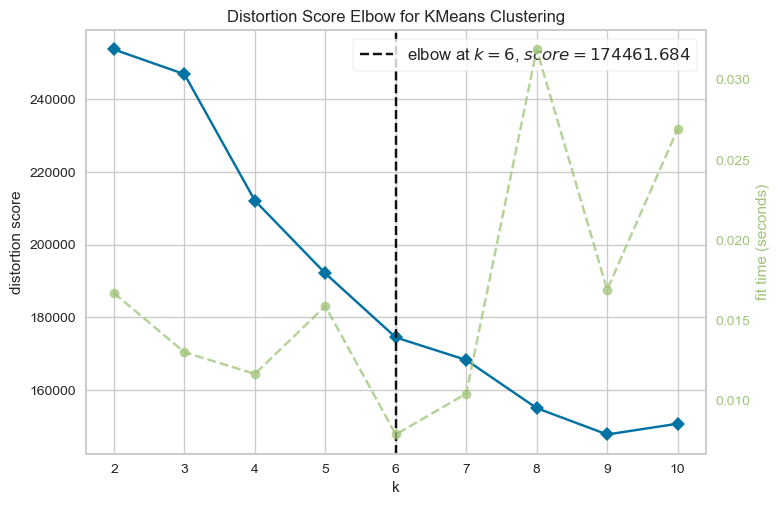

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [103]:
# Quick examination of elbow method to find numbers of clusters to make.

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(scaled_df)
Elbow_M.show()

In [100]:
k = KMeans(n_clusters = 6)
k.fit(scaled_df)

KMeans(n_clusters=6)

In [64]:
# Getting the Sillhoute score

silhouette_score(scaled_df, k.labels_)

0.19794153593572913

## Performing the KMeans Algo on the normal dff Dataframe

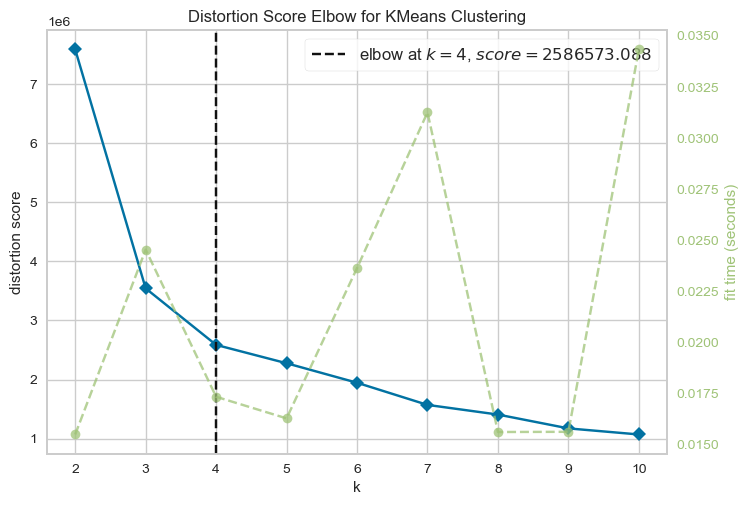

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [104]:
# Quick examination of elbow method to find numbers of clusters to make.

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(dff)
Elbow_M.show()

In [66]:
k = KMeans(n_clusters = 4)
k.fit(dff)

KMeans(n_clusters=4)

In [67]:
# Getting the Sillhoute score

silhouette_score(dff, k.labels_)

0.5525011257439072

> __From this we came to the conclusion that we will be using the Normal Dataframe rather than using the Scaled Dataframe.__

### Applying the PCA and Implemething scree Plot to see what value of k for teh PCA suits the best

In [68]:

# And Checking what value of k would be a greater fit

# Applying the PCA on the dff
pca = PCA()
pca.fit(dff)



PCA()

In [69]:
# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain 95% of the variance
k = np.argmax(cumulative_variance >= 0.95) + 1  # Adding 1 because index starts at 0
print(f"Number of components explaining 95% variance: {k}")


Number of components explaining 95% variance: 2


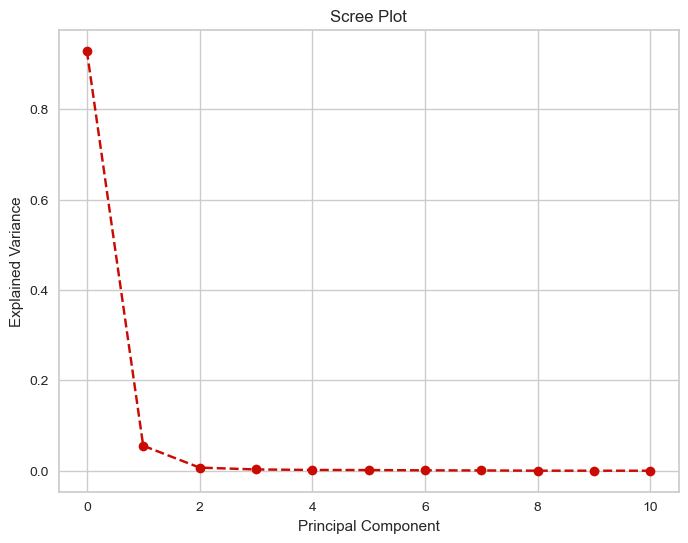

In [70]:

# Plot the scree plot (individual explained variance of each component)
plt.figure(figsize=(8,6))
plt.plot(pca.explained_variance_ratio_, marker='o', linestyle='--', color='r')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [71]:
pca_final = PCA(n_components = 2)

PCA_df_2 = pca_final.fit_transform(dff)

PCA_df_2 = pd.DataFrame(PCA_df_2, columns = (['col1', 'col2']))

In [72]:
PCA_df_2.head()

,col1,col2
0,39.415411,2.677239
1,-25.634962,3.114339
2,42.396965,2.645658
3,-21.662156,3.077860
4,-18.639311,2.670724


In [73]:
PCA_df_2.shape

(27296, 2)

In [74]:
PCA_df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,27296.0,-1.708520e-14,27.311536,-64.771730,-21.663137,2.350908,15.354175,57.436571
col2,27296.0,-4.152078e-15,6.673406,-25.081416,0.454007,2.481910,2.881802,15.939925


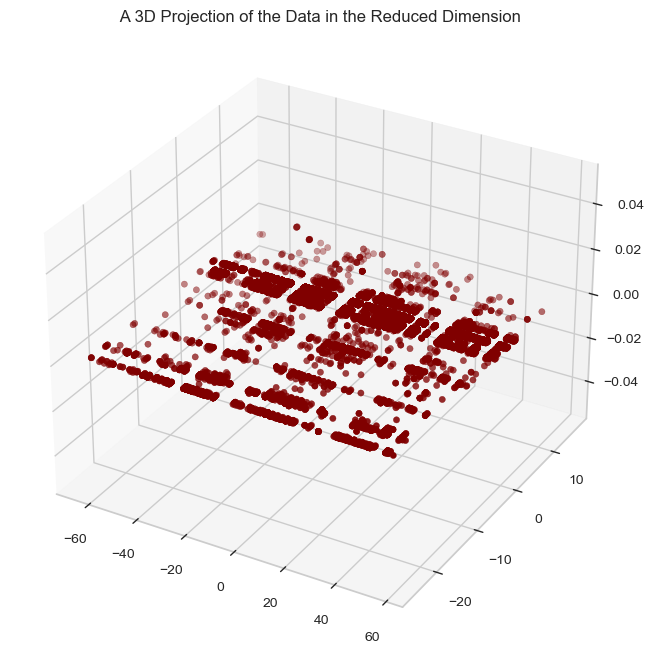

In [75]:
x = PCA_df_2['col1']
y = PCA_df_2['col2']

# To Plot

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, c = 'maroon', marker = 'o')
ax.set_title(' A 3D Projection of the Data in the Reduced Dimension')
plt.show()

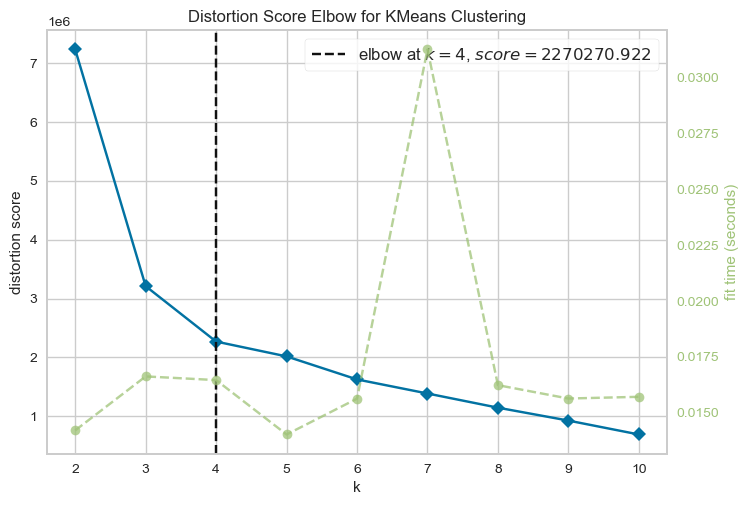

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [105]:
# Quick examination of elbow method to find numbers of clusters to make.

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df_2)
Elbow_M.show()

### From this we came to the conclusion that k = 4 i.e making 4 clusters would be an optimal option for KMeans algorithm.

In [77]:
k = KMeans(n_clusters = 4)
k.fit(PCA_df_2)

KMeans(n_clusters=4)

In [78]:
# Getting the clusters values and adding them into the variable

cluster_points = k.labels_

In [79]:
# Getting the Sillhoute score

Kmeans_score = silhouette_score(PCA_df_2, k.labels_)

### The Score for the model is 0.6 so it is considered to be a good model

In [80]:
# Adding the Cluster points to the original dataset

dff['Clusters'] = cluster_points

In [81]:
dff.shape

(27296, 12)

### Evaluating the Models

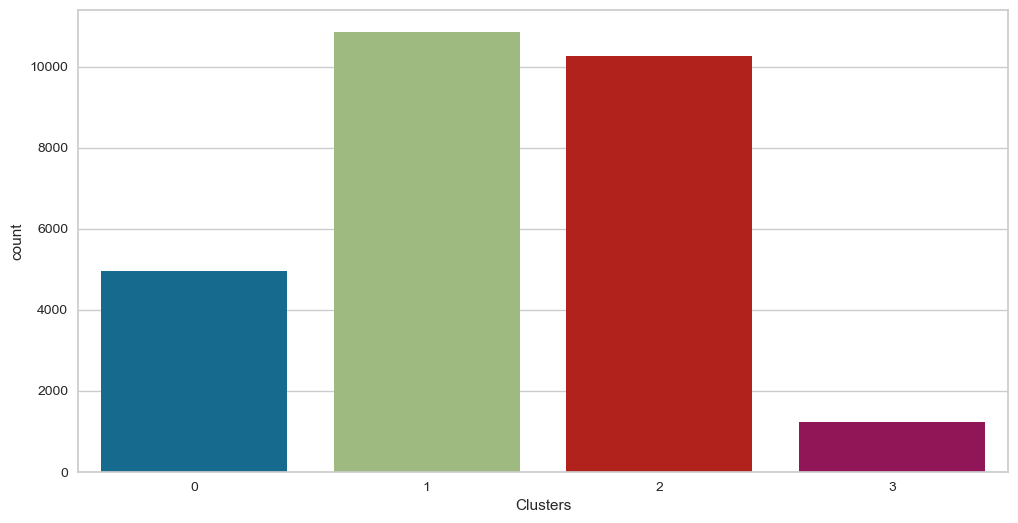

In [82]:
plt.figure(figsize = (12, 6))
sns.countplot(data = dff, x = 'Clusters')
plt.show()

In [83]:
dff.head()

,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Clusters
0,3,105,0.0,27,0,6,3,5,0,1,2,0
1,0,40,0.0,27,0,6,3,5,0,1,2,1
2,3,108,0.0,27,1,6,3,5,1,1,5,0
3,0,44,0.0,27,0,6,3,5,4,1,6,1
4,0,47,0.0,27,1,2,2,3,2,1,2,1


In [84]:
df['Clusters'] = dff['Clusters']

In [85]:
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,...,Longitude,Lon_Lat,Date,Year,Month_number,Month_name,Day,Weekdays,Hour,Clusters
0,228798151,2021-05-27,21:30:00,QUEENS,105,0.0,NaN,False,NaN,NaN,...,-73.730839,POINT (-73.73083868899994 40.662964620000025),2021-05-27,2021,5,May,27,Thursday,21,0.0
1,137471050,2014-06-27,17:40:00,BRONX,40,0.0,NaN,False,NaN,NaN,...,-73.924942,POINT (-73.92494232599995 40.81035186300006),2014-06-27,2014,6,June,27,Friday,17,1.0
2,147998800,2015-11-21,03:56:00,QUEENS,108,0.0,NaN,True,NaN,NaN,...,-73.915492,POINT (-73.91549174199997 40.74260663300004),2015-11-21,2015,11,November,21,Saturday,3,0.0
3,146837977,2015-10-09,18:30:00,BRONX,44,0.0,NaN,False,NaN,NaN,...,-73.919457,POINT (-73.91945661499994 40.83778200300003),2015-10-09,2015,10,October,9,Friday,18,1.0
4,58921844,2009-02-19,22:58:00,BRONX,47,0.0,NaN,True,25-44,M,...,-73.852910,POINT (-73.85290950899997 40.88623791800006),2009-02-19,2009,2,February,19,Thursday,22,1.0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27308 entries, 0 to 27311
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   INCIDENT_KEY             27308 non-null  int64         
 1   OCCUR_DATE               27308 non-null  datetime64[ns]
 2   OCCUR_TIME               27308 non-null  object        
 3   BORO                     27308 non-null  object        
 4   PRECINCT                 27308 non-null  int64         
 5   JURISDICTION_CODE        27306 non-null  float64       
 6   LOCATION_DESC            12331 non-null  object        
 7   STATISTICAL_MURDER_FLAG  27308 non-null  bool          
 8   PERP_AGE_GROUP           17964 non-null  object        
 9   PERP_SEX                 17998 non-null  object        
 10  PERP_RACE                17998 non-null  object        
 11  VIC_AGE_GROUP            27308 non-null  object        
 12  VIC_SEX                  27308 n

### 📊 **Visualization Overview**

__This bar chart illustrates the distribution of the `STATISTICAL_MURDER_FLAG` variable__
__across different victim racial categories (`VIC RACE`) within four clusters (0.0, 1.0, 2.0, and 3.0).__
 
___Key Components:___
> **X-axis (`VIC RACE`)**: Represents the different racial categories of victims.
> **Y-axis (`STATISTICAL_MURDER_FLAG`)**: Shows the average proportion of occurrences where the "murder flag" is active.
> **Color-coded Bars for Clusters**: Each color denotes a different cluster, allowing for a comparative view of 
___`STATISTICAL_MURDER_FLAG` across racial groups and clusters.___
> **Error Bars**: Indicate the variability (standard error) within each group.

___Insights:___
> This visualization helps identify any racial group or cluster with a significantly higher or lower `STATISTICAL_MURDER_FLAG` 
value, potentially highlighting disparities or trends across clusters and racial categories.

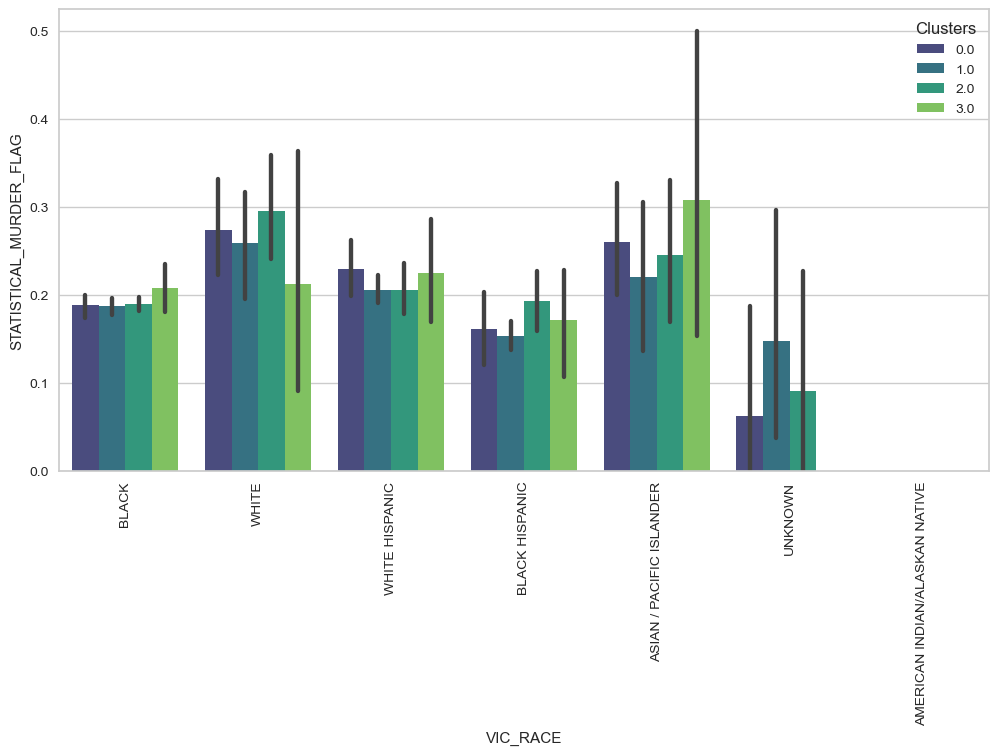

In [87]:
plt.figure(figsize=(12, 6))
sns.barplot(data = df, x = 'VIC_RACE', y = 'STATISTICAL_MURDER_FLAG', hue = 'Clusters', palette = 'viridis')
plt.xticks(rotation = 90)

plt.show()

### 📊 **Visualization Overview**

__This bar chart illustrates the distribution of the `STATISTICAL_MURDER_FLAG` variable__
__across different victim racial categories (`PERP_RACE`) within four clusters (0.0, 1.0, 2.0, and 3.0).__
 
___Key Components:___
> **X-axis (`PERP RACE`)**: Represents the different racial categories of victims.
> **Y-axis (`STATISTICAL_MURDER_FLAG`)**: Shows the average proportion of occurrences where the "murder flag" is active.
> **Color-coded Bars for Clusters**: Each color denotes a different cluster, allowing for a comparative view of 
___`STATISTICAL_MURDER_FLAG` across racial groups and clusters.___
> **Error Bars**: Indicate the variability (standard error) within each group.

___Insights:___
> This visualization helps identify any racial group or cluster with a significantly higher or lower `STATISTICAL_MURDER_FLAG` 
value, potentially highlighting disparities or trends across clusters and racial categories.


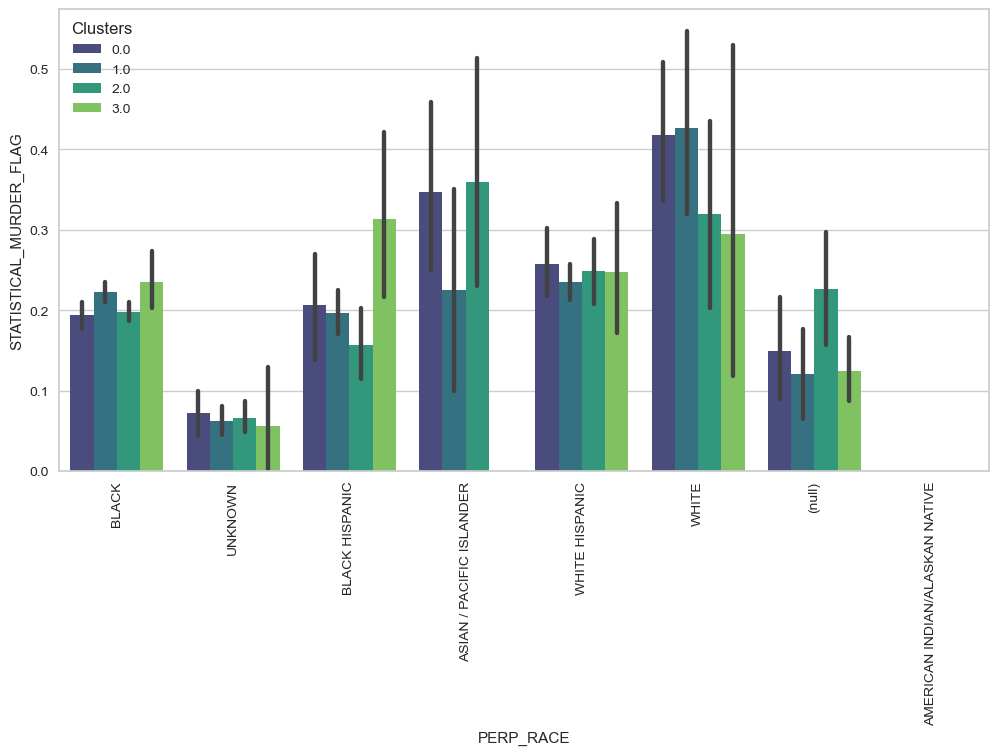

In [88]:
plt.figure(figsize=(12, 6))
sns.barplot(data = df, x = 'PERP_RACE', y = 'STATISTICAL_MURDER_FLAG', hue = 'Clusters', palette = 'viridis')
plt.xticks(rotation = 90)

plt.show()

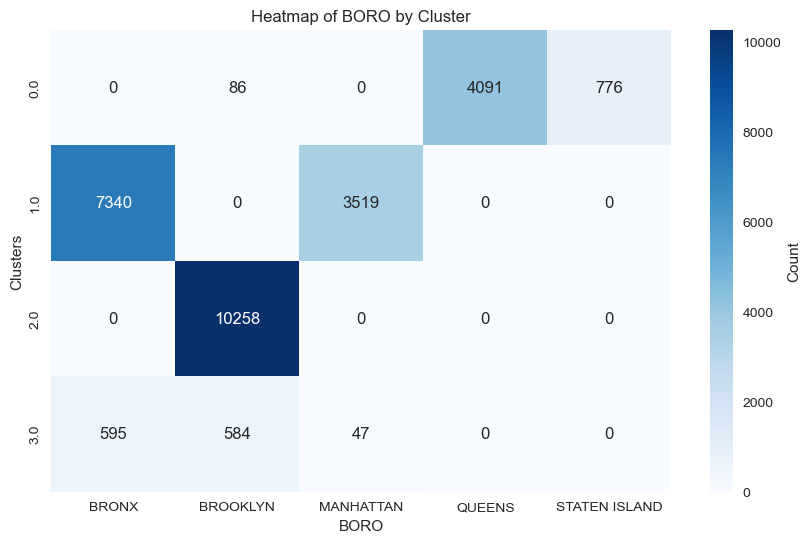

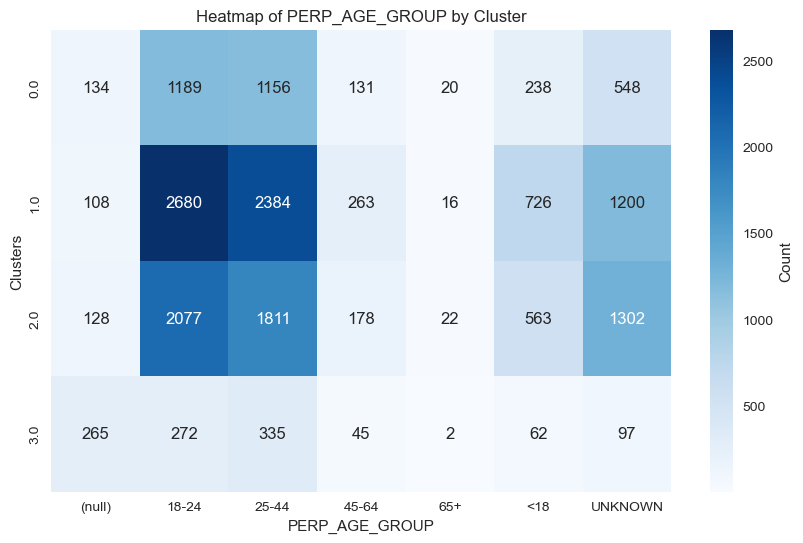

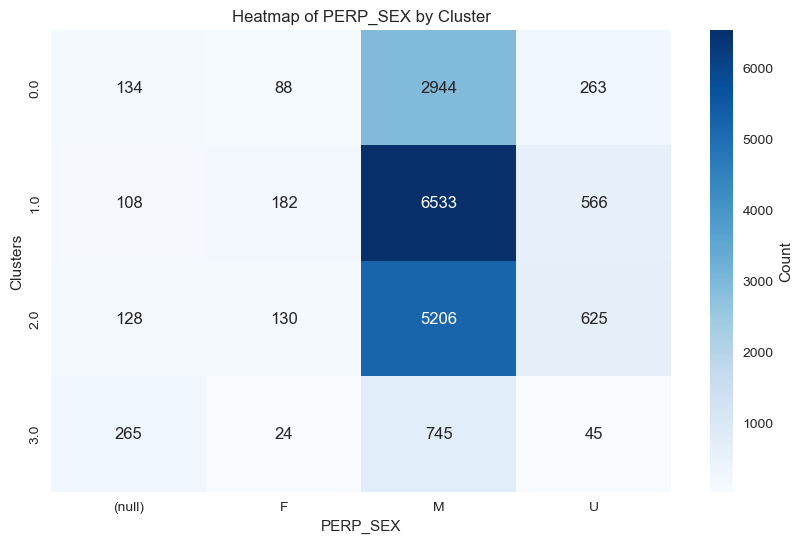

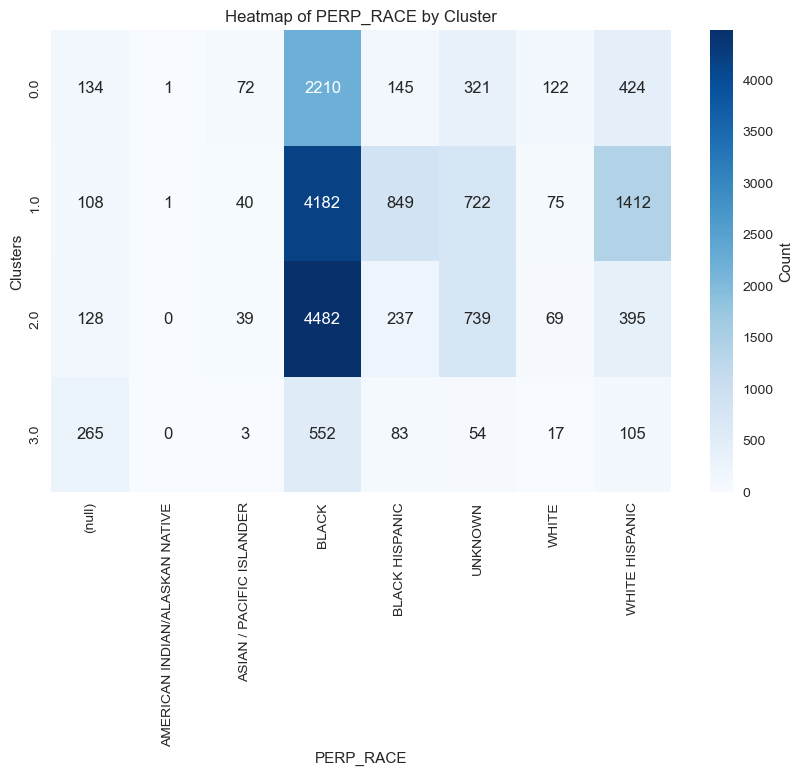

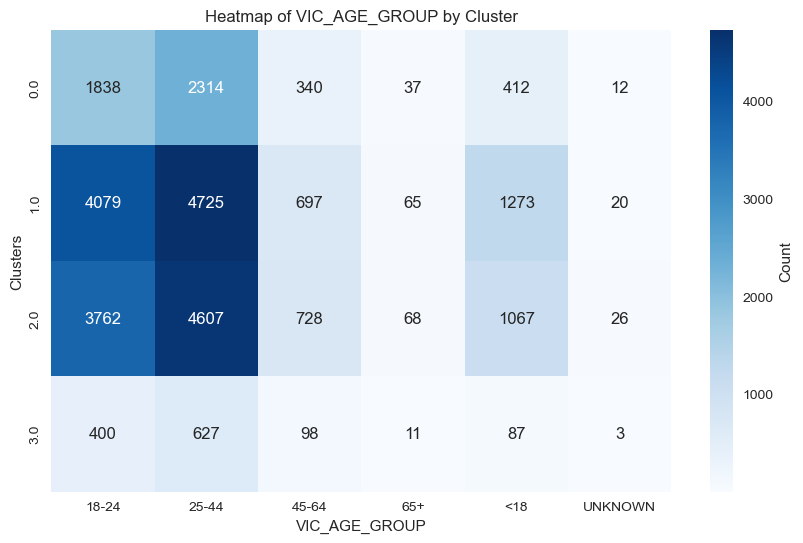

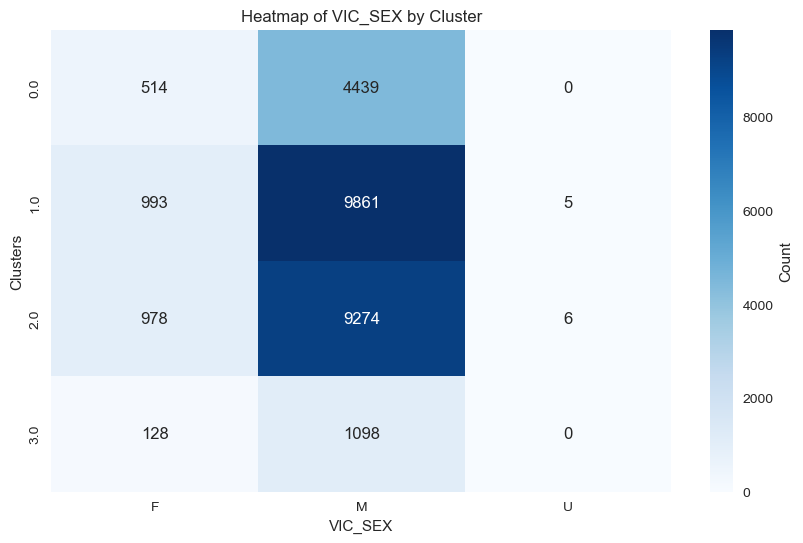

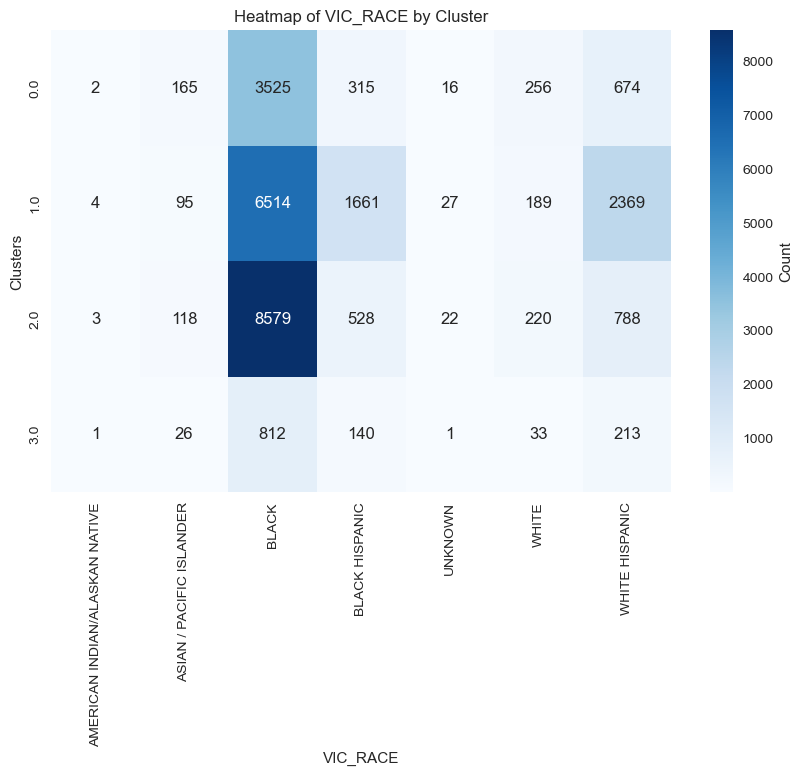

In [89]:
columns_to_exclude = ['OCCUR_TIME', 'Lon_Lat', 'Month_name', 'Weekdays', 'LOCATION_DESC']  # Add any columns you want to exclude

# Get the list of categorical columns
categorical_columns_name = df.select_dtypes(include=['object', 'category']).columns

# Filter out the excluded columns
filtered_categorical_columns = [col for col in categorical_columns_name if col not in columns_to_exclude]

# Loop through each filtered categorical column
for index, cat_col_name in enumerate(filtered_categorical_columns):
    # Create a cross-tabulation for the current categorical column with 'Clusters'
    cross_tab = pd.crosstab(df['Clusters'], df[cat_col_name])

    # Create a heatmap for the cross-tabulation
    plt.figure(figsize=(10, 6))
    sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
    plt.title(f'Heatmap of {cat_col_name} by Cluster')
    plt.xlabel(cat_col_name)
    plt.ylabel('Clusters')
    plt.show()
    


### Graph 1 ( BORO v/s Clusters )

> __This heatmap represents the distribution of a categorical variable, BORO (boroughs), across different clusters (0.0, 1.0, 2.0, and 3.0). Each cell shows the count of instances for a specific borough within a given cluster, and the color intensity reflects the magnitude of these counts, with darker shades indicating higher values.__

___Key Insights:___

__Distribution Across Clusters:__

> Cluster 1 has high counts in the Bronx (7,340) and Manhattan (3,519).

> Cluster 2 shows a strong concentration in Brooklyn (10,258), suggesting this cluster is heavily represented by data points from this borough.

> Cluster 0 has a notable presence in Queens (4,091) and Staten Island (776).

> Cluster 3 has relatively low counts across all boroughs, indicating a smaller representation.

__Cluster-Borough Relationships:__

> Certain boroughs are predominant in specific clusters, e.g., Brooklyn in Cluster 2, Bronx in Cluster 1, and Queens in Cluster 0.

> Some borough-cluster combinations, like Manhattan in Clusters 0 and 2, have zero counts, indicating no representation.

### Garph 2 ( PERP_AGE_GROUP v/s Cluster )

> __This heatmap shows the distribution of the PERP_AGE_GROUP variable (perpetrator age groups) across different clusters (0.0, 1.0, 2.0, and 3.0). Each cell indicates the count of individuals in a particular age group within each cluster. The color intensity represents the magnitude of these counts, with darker shades signifying higher values.__

___Key Insights:___

__Age Group Distribution Across Clusters:__

> Cluster 1 has the highest counts in the 18-24 and 25-44 age groups, with 2,680 and 2,384 respectively. This suggests that perpetrators in this cluster are predominantly within these age ranges.

> Cluster 2 also has high counts in the 18-24 and 25-44 age groups, but slightly lower than Cluster 1, with 2,077 and 1,811 counts respectively.

> Cluster 0 has a moderate presence across most age groups, with notable counts in the 18-24 (1,189) and 25-44 (1,156) age groups.

> Cluster 3 has relatively low counts across all age groups, indicating fewer cases in this cluster.
Special Cases:

> The <18 and 65+ age groups have the lowest counts across all clusters, indicating fewer occurrences of perpetrators in these age brackets.

> The UNKNOWN age group has noticeable counts across clusters, with Cluster 2 having the highest at 1,302, potentially signifying cases where age data was missing or unreported.
Null Values:

> The (null) category indicates instances with missing age group information. It has relatively low counts across all clusters.


### Graph 3 ( PERP_SEX v/s Clusters )

> __This heatmap shows the distribution of the PERP_SEX variable (perpetrator sex) across different clusters (0.0, 1.0, 2.0, and 3.0). Each cell indicates the count of individuals of a particular sex within each cluster. The color intensity represents the magnitude of these counts, with darker shades signifying higher values.__

___Key Insights:___

__Sex Distribution Across Clusters:__

> Cluster 1 has the highest count of male perpetrators (M) with 6,533, indicating that this cluster predominantly consists of male individuals.

> Cluster 2 also has a high count of male perpetrators (M) with 5,206, but slightly lower than Cluster 1.

> Cluster 0 has a significant number of male perpetrators (M) with 2,944, but fewer compared to Clusters 1 and 2.

> Cluster 3 has the lowest count of male perpetrators (M) with 745, indicating fewer cases in this cluster.

__Special Cases:__

> The (null) category, which indicates instances with missing sex information, has noticeable counts across all clusters, with Cluster 3 having the highest at 265.

> Female perpetrators (F) are present in all clusters but in lower numbers compared to males, with Cluster 1 having the highest count of 182.

> The 'U' category, which might represent unknown or unreported sex, has relatively low counts across all clusters, with Cluster 2 having the highest at 625.

__Null Values:__

> The (null) category indicates instances with missing sex information. It has relatively low counts across all clusters, with Cluster 3 having the highest at 265.


### Garph 4 ( PERP_RACE v/s Clusters )

> __This heatmap shows the distribution of the PERP_RACE variable (perpetrator race) across different clusters (0.0, 1.0, 2.0, and 3.0). Each cell indicates the count of individuals in a particular race within each cluster. The color intensity represents the magnitude of these counts, with darker shades signifying higher values.__

___Key Insights:___

__Race Distribution Across Clusters:__

> Cluster 2 has the highest count of BLACK perpetrators with 4,482, indicating this cluster predominantly consists of BLACK individuals.

> Cluster 1 also has a high count of BLACK perpetrators with 3,188, though lower than Cluster 2.

> Cluster 0 has significant numbers across various races, notably 2,619 BLACK and 2,239 WHITE individuals.

> Cluster 3 has relatively low counts across all races, indicating fewer cases in this cluster.

__Special Cases:__

> The (null) category, indicating instances with missing race information, has noticeable counts across all clusters, with Cluster 2 having the highest at 1,123.

> AMERICAN INDIAN/ALASKAN NATIVE and ASIAN / PACIFIC ISLANDER races have lower counts across all clusters compared to other races.

> The 'UNKNOWN' category has relatively low counts across all clusters, with Cluster 2 having the highest at 738.

__Null Values:__

> The (null) category indicates instances with missing race information. It has relatively low counts across all clusters, with Cluster 2 having the highest at 1,123.


### Graph 5 ( VIC_AGE_GROUP v/s Clusters )


>__This heatmap shows the distribution of the VIC_AGE_GROUP variable (victim age groups) across different clusters (0.0, 1.0, 2.0, and 3.0). Each cell indicates the count of individuals in a particular age group within each cluster. The color intensity represents the magnitude of these counts, with darker shades signifying higher values.__

___Key Insights:___

__Age Group Distribution Across Clusters:__

> Cluster 1 has the highest counts in the 18-24 and 25-44 age groups, with 4,079 and 4,725 respectively, indicating a predominance of younger victims in this cluster.

> Cluster 2 also shows high counts in the 18-24 and 25-44 age groups, slightly lower than Cluster 1, with 3,762 and 4,607 counts respectively.

> Cluster 0 has moderate presence across most age groups, with notable counts in the 18-24 (1,838) and 25-44 (2,314) age groups.

> Cluster 3 has relatively low counts across all age groups, indicating fewer cases in this cluster.

__Special Cases:__

> The <18 and 65+ age groups have the lowest counts across all clusters, indicating fewer occurrences of victims in these age brackets.

> The UNKNOWN age group has noticeable counts across clusters, with Cluster 2 having the highest at 26, potentially indicating cases where age data was missing or unreported.


### Garph 6 ( VIC_SEX v/s Clusters )


>__This heatmap shows the distribution of the VIC_SEX variable (victim sex) across different clusters (0.0, 1.0, 2.0, and 3.0). Each cell indicates the count of individuals in a particular sex within each cluster. The color intensity represents the magnitude of these counts, with darker shades signifying higher values.__

___Key Insights:___

__Sex Distribution Across Clusters:__

> Cluster 1 has the highest count of male victims (M) with 9,861, indicating that this cluster predominantly consists of male individuals.

> Cluster 2 also has a high count of male victims (M) with 9,274, but slightly lower than Cluster 1.

> Cluster 0 has a significant number of male victims (M) with 4,439, but fewer compared to Clusters 1 and 2.

> Cluster 3 has the lowest count of male victims (M) with 1,098, indicating fewer cases in this cluster.

__Special Cases:__

> Female victims (F) are present in all clusters but in lower numbers compared to males, with Cluster 1 having the highest count of 993.

> The 'U' category, which might represent unknown or unreported sex, has relatively low counts across all clusters, with Clusters 1 and 2 having the highest at 5 and 6 respectively.


### Graph 7 ( VIC_RACE v/s Clusters )


>__This heatmap shows the distribution of the VIC_RACE variable (victim race) across different clusters (0.0, 1.0, 2.0, and 3.0). Each cell indicates the count of individuals in a particular race within each cluster. The color intensity represents the magnitude of these counts, with darker shades signifying higher values.__

___Key Insights:___

__Race Distribution Across Clusters:__

> Cluster 2 has the highest count of BLACK victims with 8,579, indicating that this cluster predominantly consists of BLACK individuals.

> Cluster 1 also has a high count of BLACK victims with 6,514, though lower than Cluster 2.

> Cluster 0 has notable numbers across various races, including 4,390 BLACK and 3,342 WHITE victims.

> Cluster 3 has relatively low counts across all races, indicating fewer cases in this cluster.

__Special Cases:__

> The UNKNOWN and WHITE HISPANIC categories have the lowest counts across all clusters, with Cluster 3 having the lowest at 1 each.

> ASIAN / PACIFIC ISLANDER and AMERICAN INDIAN/ALASKAN NATIVE races have lower counts across all clusters compared to other races, yet Cluster 1 has the highest count for ASIAN / PACIFIC ISLANDER with 278.

__Null Values:__

> The (null) category, indicating instances with missing race information, has noticeable counts across all clusters, with Cluster 2 having the highest at 1,369.

### Agglomerative Clustering with Different Linkage Methods

In [90]:

linkage_methods = ['ward', 'complete', 'average', 'single']
agglo_scores = {}

for method in linkage_methods:
    agglo = AgglomerativeClustering(n_clusters=4, linkage=method)
    labels = agglo.fit_predict(PCA_df_2)
    score = silhouette_score(PCA_df_2, labels)
    agglo_scores[method] = score
    print(f'Linkage Method: {method}, Silhouette Score: {score}')


Linkage Method: ward, Silhouette Score: 0.5968614396049625
Linkage Method: complete, Silhouette Score: 0.6014207804818569
Linkage Method: average, Silhouette Score: 0.6062904671360647
Linkage Method: single, Silhouette Score: 0.5710903293831133


__In this code, we are performing Agglomerative Clustering on a PCA-transformed dataset using different linkage methods.__ 

> ___Agglomerative Clustering:___ 

> __This is a type of hierarchical clustering where each data point starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.__ 

__Linkage Methods:__

- Ward: Minimizes the total within-cluster variance. It is effective for clusters of various shapes and sizes.
- Complete: Also known as the maximum or farthest point linkage, it merges clusters based on the maximum distance between elements.
- Average: This method merges clusters based on the average distance between elements of each cluster.
- Single: Also known as the minimum or nearest point linkage, it merges clusters based on the minimum distance between elements.

>__The silhouette score is used to evaluate the quality of the clustering, with higher scores indicating better-defined clusters.__


### Mean Shift Clustering

In [91]:

mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(PCA_df_2)
mean_shift_score = silhouette_score(PCA_df_2, mean_shift_labels)

print(f'Mean Shift Silhouette Score: {mean_shift_score}')


Mean Shift Silhouette Score: 0.605931266613342


__In this code, we are performing Mean Shift Clustering on a PCA-transformed dataset.__

> ___Mean Shift Clustering:___

> This is a non-parametric clustering technique that involves shifting each data point towards the mode (peak) of its neighborhood. This method does not require specifying the number of clusters in advance, making it flexible for various datasets.

> __The silhouette score is used to evaluate the quality of the clustering, with higher scores indicating better-defined clusters.__



### Final Accuracy Matrix

In [92]:
# Making the DataFrame of the Final Accuracy Chart so comparing the results would be easy

final_accuracy = pd.DataFrame(
{'Algorithm' : ['KMeans_Clustering', 'Agglomerative_Ward', 'Agglomerative_Complete', 'Agglomerative_Average', 'Agglomerative_Single',
               'Mean_Shift_clustering'],
 'Accuracy' : [Kmeans_score, agglo_scores['ward'], agglo_scores['complete'], agglo_scores['average'], agglo_scores['single'],
               mean_shift_score]}
)

<function matplotlib.pyplot.show(close=None, block=None)>

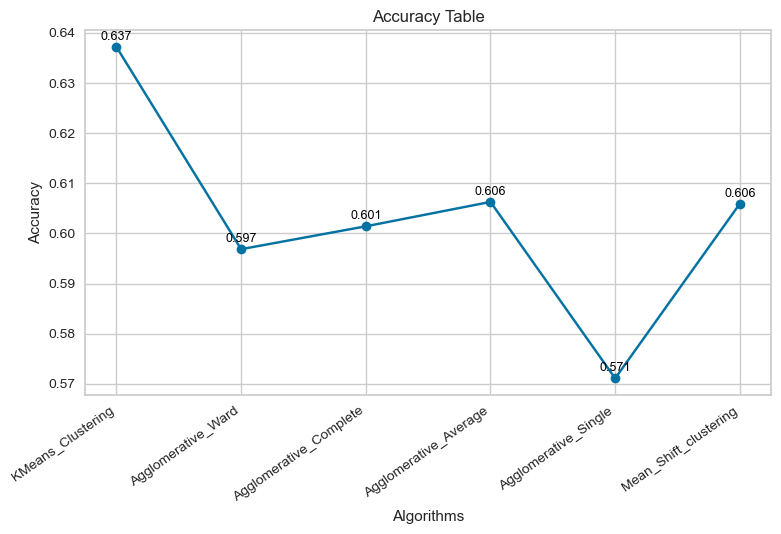

In [93]:
# plotting the results

# Add labels to the marker points
for i, value in enumerate(final_accuracy['Accuracy']):
    plt.text(final_accuracy['Algorithm'][i], value + (0.00080),  # Slightly above the marker
             f'{value:.3f}', ha='center', va='bottom', fontsize=9, color='black')

plt.plot(final_accuracy['Algorithm'], final_accuracy['Accuracy'], marker = 'o')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Table')
plt.xticks(rotation = 35, ha = 'right')
plt.tight_layout()
plt.show


___This graph depicts the silhouette scores for various clustering algorithms. KMeans Clustering achieves the highest silhouette score at 0.637, indicating the most well-defined clusters. Conversely, Agglomerative Single has the lowest silhouette score at 0.571, suggesting less distinct clusters. This visual comparison underscores the superior performance of KMeans among the clustering methods tested, providing valuable insight into their relative effectiveness.___


In [94]:
final_accuracy.style.background_gradient()

,Algorithm,Accuracy
0,KMeans_Clustering,0.637209
1,Agglomerative_Ward,0.596861
2,Agglomerative_Complete,0.601421
3,Agglomerative_Average,0.606290
4,Agglomerative_Single,0.571090
5,Mean_Shift_clustering,0.605931


<div style="text-align: center;">
    <h1>Conclusion</h1>
</div>

### In this analysis, various clustering algorithms were applied to the NYC Shooting dataset to identify patterns and groupings within the data. The key findings include:

1. **KMeans Clustering** emerged as the most effective method with the highest silhouette score, indicating well-defined clusters.
2. **Agglomerative Clustering** with different linkage methods showed varying performance, with the 'ward' method performing better than 'complete', 'average', and 'single'.
3. **Mean Shift Clustering** provided flexible clustering without the need for predefining the number of clusters, but its silhouette score was lower than that of KMeans.
4. The analysis of victim and perpetrator demographics revealed distinct patterns across clusters, helping to understand the distribution of age, sex, and race among the victims and perpetrators.
5. Spatial and temporal trends, such as borough-specific distributions and yearly variations, highlighted areas and times with higher incidences of shootings.

___Overall, the clustering analysis provided valuable insights into the underlying patterns in the NYC Shooting data, which could inform targeted interventions and policy decisions.____
